In [18]:
import sys

import librosa  # python package for music and audio analysis
import librosa.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

In [19]:
train = pd.read_csv('./data/train.csv')

In [20]:
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [21]:
train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

In [22]:
first_row = train.iloc[0]

In [23]:
# We will only look at the first bird's first recording to learn about audio data in general
first_row_file = './data/train_audio/' + first_row['ebird_code'] + '/' + first_row['filename']

# Listen to the recording
ipd.display(ipd.Audio(first_row_file))

In [24]:
# Load the mp3 file
# This returns the recorded samples of amplitudes(change in air pressure) and the sample rate
# We will take the first 10 seconds of the recording for now and use the original sample rate
signal, sample_rate = librosa.load(first_row_file, duration=10, mono=True)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [25]:
signal.shape

(220500,)

In [26]:
# To show the duration of the loaded signal
signal.shape[0]/sample_rate

10.0

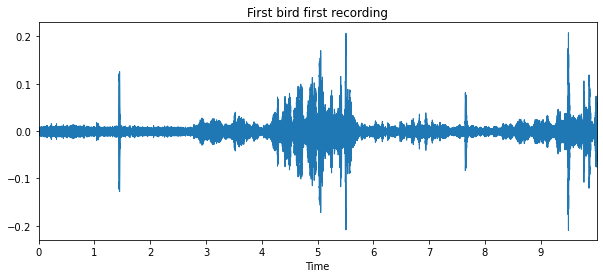

In [27]:
# Plot the recorded signal with its amplitude against time
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sample_rate)
plt.title('First bird first recording')
plt.show()

In [28]:
# https://musicinformationretrieval.com/index.html
#
# Get the Short Time Fourier transforms of the signal
# the Fourier transform: https://musicinformationretrieval.com/fourier_transform.html
# It is a way to represent a signal in terms of its sound spectrum over a fixed window
#
# the Short Time Fourier Transform: https://musicinformationretrieval.com/stft.html
# It is a way to represent a signal in terms of its sound spectrum over time by
# computing a bunch of overlapping Fourier transforms throughout the signal

n_fft = 2048
hop_length = 512

stft_signal = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))

In [29]:
stft_signal.shape

(1025, 431)

In [30]:
# The unit of seconds for each frame of FFT
n_fft/sample_rate

0.09287981859410431

In [31]:
D = librosa.amplitude_to_db(stft_signal, ref=np.max)

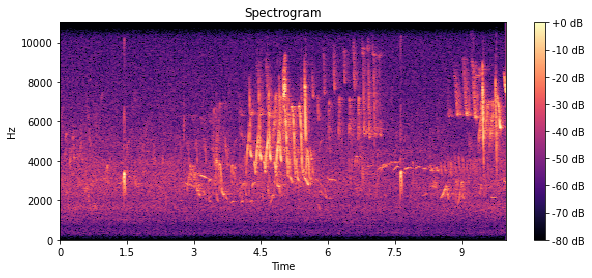

In [32]:
# Plot spectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [33]:
# Plot mel-spectrogram
n_fft = 2048
hop_length = 512   
n_mels = 64
fmin = 0 

# Two neat explainers:
# http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
# https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
# It is a transformation or summary of periodograms on overlapping windows of an audio signal to better portray human perception
S = librosa.feature.melspectrogram(
    n_fft=n_fft,
    hop_length=hop_length, 
    n_mels=n_mels, 
    y=signal,
    sr=sample_rate,
    htk=True,
    fmin=fmin, 
    fmax=sample_rate/2
) 

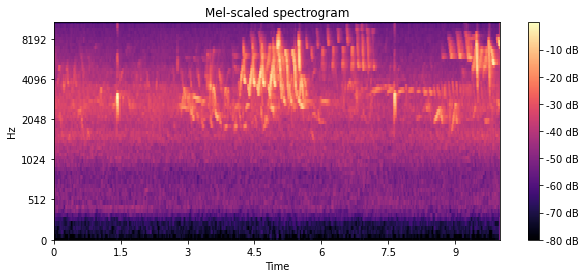

In [34]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), fmin=fmin, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

In [35]:
fmin = 1400

S = librosa.feature.melspectrogram(
    n_fft=n_fft,
    hop_length=hop_length, 
    n_mels=n_mels, 
    y=signal,
    sr=sample_rate,
    htk=True,
    fmin=fmin, 
    fmax=sample_rate/2
) 

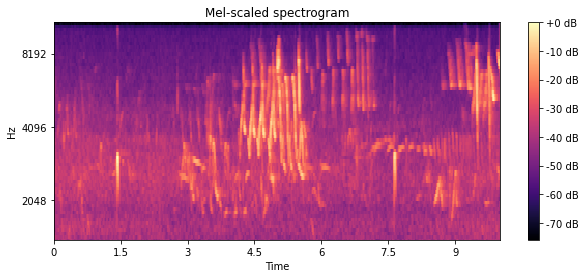

In [36]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), fmin=fmin, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

Applying a minimum frequency of 1400 makes the spectrogram look more distinguishable.